<h3 style="color:red;">Term neonate of 38 weeks of gestation and 3.3 kg at 48 hours</h3>


 Model 'normal neonate' loaded and initialized correctly.
 Ready in 3.1 sec. Average model step in 0.0257 ms.
Heart.heart_rate: max      110.0 min      110.0
AA.pres         : max   63.92449, min   40.81748 mmHg
PA.pres         : max   36.18759, min    18.5006 mmHg
LV_AA.flow      : net  177.60418, forward  177.60418, backward        0.0 ml/kg/min, stroke volume:    1.61457 ml/kg, 
RV_PA.flow      : net  180.71543, forward  180.71543, backward        0.0 ml/kg/min, stroke volume:    1.64285 ml/kg, 
SVC_RA.flow     : net   77.27629, forward   84.04111, backward   -6.76482 ml/kg/min, stroke volume:    0.70251 ml/kg, 
AAR_AD.flow     : net   98.29118, forward   99.58748, backward    -1.2963 ml/kg/min, stroke volume:    0.89355 ml/kg, 
LV.vol          : max    2.49511, min    0.88054 ml/kg
RV.vol          : max    3.12478, min    1.48192 ml/kg


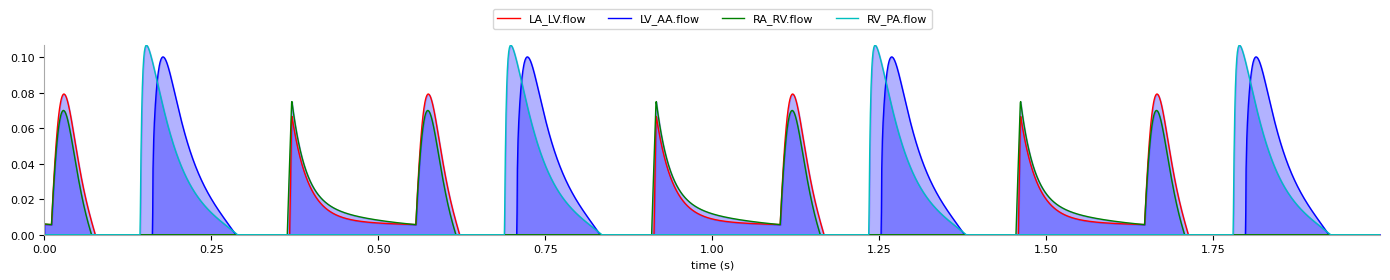

In [7]:
# as this notebook is run from a subfolder, we need to change the working directory to the root folder
import os

if os.getcwd().split("/")[-1] != "explain-python":
    os.chdir("..")

# import the model engine and the model interface
from explain_core.ModelEngine import ModelEngine

# instantiate a model engine instance with the 'normal_neonate' model definition
model = ModelEngine("definitions/normal_neonate.json")

# report the gas pressures in kPa
model.set_pressure_unit("kpa")

# get a reference to all the submodels
models = model.models

# instantiate a custom interface object especially designed to interact with the neonatal model engine instance
from interfaces.NeoInterface import NeoInterface

neo = NeoInterface(model)

# enable or disable the physiological submodels which can be enabled or disabled.
neo.ans(False)
neo.breathing(False)
neo.metabolism(False)
neo.mob(True)
neo.pda(False)

# enable or disable the extra-corporeal models
neo.placenta(False)
neo.ventilator(False)
neo.ecls(False)
neo.resuscitation(False)

model.models["LA"].el_min = 1260.0
model.models["LA"].el_max = 4100.0

model.models["LV"].u_vol = 0.00
model.models["LV"].el_min = 1063.0
model.models["LV"].el_max = 22500.0

model.models["RA"].el_min = 1260.0
model.models["RA"].el_max = 4100.0

model.models["RV"].u_vol = 0.0033
model.models["RV"].el_min = 1159.0
model.models["RV"].el_max = 24200.0

model._scaling.u_vol_ratio_factor = 1.0

# scale the baseline patient to a gestational age of 40 weeks, 3.568 kg and height 0.512 meters
model._scaling.scale_patient(
    weight=3.545,
    height=0.519,
    blood_volume=0.08,
    lung_volume=0.03,
    res_circ_factor=1.17,
    el_base_circ_factor=1.0,
    el_min_circ_factor=1.0,
    el_max_circ_factor=1.0,
    res_resp_factor=1.0,
    el_base_resp_factor=1.0,
    hr_ref=110.0,
    syst_ref=66.0,
    diast_ref=40.0,
    map_ref=51.26,
    resp_rate=40.0,
    vt_rr_ratio=0.0001212,
    mv_ref=0.2
)


# stabilize the model by calculating 120 seconds
neo.calculate(60)
neo.validate()
neo.plot_heart_flows()

<h5 style="color:red;">Model run results</h5>

<h5 style="color:red;">Blood flows and volumes target data</h5>
<a href="https://pubmed.ncbi.nlm.nih.gov/20971721/">Groves AM, Chiesa G, Durighel G, Goldring ST, Fitzpatrick JA, Uribe S, Razavi R, Hajnal JV, Edwards AD. Functional cardiac MRI in preterm and term newborns. Arch Dis Child Fetal Neonatal Ed. 2011 Mar;96(2):F86-91. doi: 10.1136/adc.2010.189142. Epub 2010 Oct 21. PMID: 20971721; PMCID: PMC3093932.</a><br>
<img src="../documentation/images/GrovesFigure3.jpg" width="600" height="480"></img>
<img src="../documentation/images/GrovesFigure5.jpg" width="600" height="480"></img><br>
<!-- <img src="../documentation/images/GrovesTable1.jpg" width="300" height="100"></img>
<img src="../documentation/images/GrovesTable3.jpg" width="280" height="100"></img> -->

<a href="https://pubmed.ncbi.nlm.nih.gov/37095534/">Jhaveri S, Battersby E, Stern KWD, Cohen J, Yang Y, Price A, Hughes E, Poston L, Pasupathy D, Taylor P, Vieira MC, Groves A. Normative ranges of biventricular volumes and function in healthy term newborns. J Cardiovasc Magn Reson. 2023 Apr 24;25(1):26. doi: 10.1186/s12968-023-00932-1. PMID: 37095534; PMCID: PMC10127416.</a><br>

<h5 style="color:red;">Blood pressure target data</h5>


<a href="https://pubmed.ncbi.nlm.nih.gov/36858885/">van Zadelhoff AC, Poppe JA, Willemsen S, Mauff K, van Weteringen W, Goos TG, Reiss IKM, Vermeulen MJ, de Graaff JC. Age-dependent changes in arterial blood pressure in neonates during the first week of life: reference values and development of a model. Br J Anaesth. 2023 May;130(5):585-594. doi: 10.1016/j.bja.2023.01.024. Epub 2023 Feb 28. PMID: 36858885.</a><br><br>
<img src="../documentation/images/ZadelhoffSystolicFigure4.jpg" width="600" height="650"></img>
<img src="../documentation/images/ZadelhoffDiastolicFigure4.jpg" width="600" height="650"></img><br>

In [ ]:
# get additional model data, heartrate and resp_rate in beats and breaths per minute, pressures in mmHg, po2 and pco2 in kPa, hco3 and base excess (be) in mmol/l
neo.get_vitals()

In [ ]:
# plot the mitral valve flow where in a normal neonate of 24 hours the E/A ratio is just above 1.0
neo.plot_time_graph(
    ["LA_LV.flow"], time_to_calculate=5, sampleinterval=0.0005, weight_based=True
)

In [ ]:
neo.plot_heart_flows_left()

In [9]:
neo.calculate(60)
neo.get_total_blood_volume()

 Ready in 3.4 sec. Average model step in 0.0282 ms.
Total blood volume: 80.00000000000061 ml/kg = 100.0%
Systemic blood volume: 71.58846528468503 ml/kg = 89.4855816058556%
Pulmonary total blood volume: 8.411534715315582 ml/kg = 10.514418394144396%
Pulmonary capillary blood volume: 3.570196030136317 ml/kg = 42.444050354280336% of total pulmonary blood volume
Heart blood volume: 5.686711773569428 ml/kg = 7.10838971696173%
Capillary blood volume: 4.085406839833412 ml/kg = 5.106758549791725%
Venous blood volume: 51.15339537111672 ml/kg = 63.94174421389541%
Arterial blood volume: 10.608621610479515 ml/kg = 13.260777013099293%
Upper body blood volume: 21.324987771912213 ml/kg = 26.656234714890058%
Lower body blood volume: 44.52243604951744 ml/kg = 55.65304506189638%


0.2836000000000022